# Import the libraries

In [72]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

# Load the Dataset

In [73]:
df = pd.read_csv("Housing_Data.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


# Understanding the data

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [75]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [76]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [77]:
df.duplicated().sum()

0

# Visualising the Data

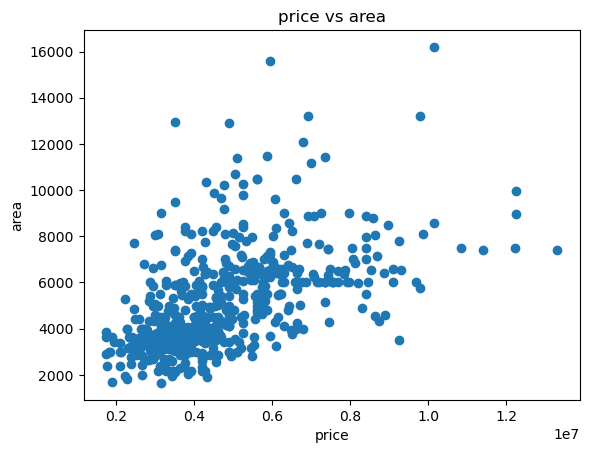

In [78]:
plt.scatter(x="price",y="area",data=df)
plt.title("price vs area")
plt.xlabel("price")
plt.ylabel("area")
plt.show()

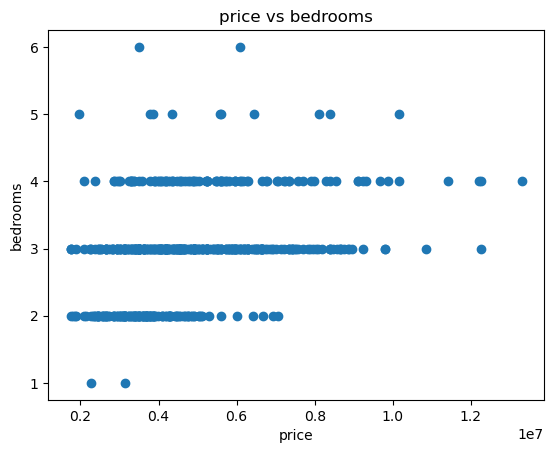

In [79]:
plt.scatter(x="price",y="bedrooms",data=df)
plt.title("price vs bedrooms")
plt.xlabel("price")
plt.ylabel("bedrooms")
plt.show()

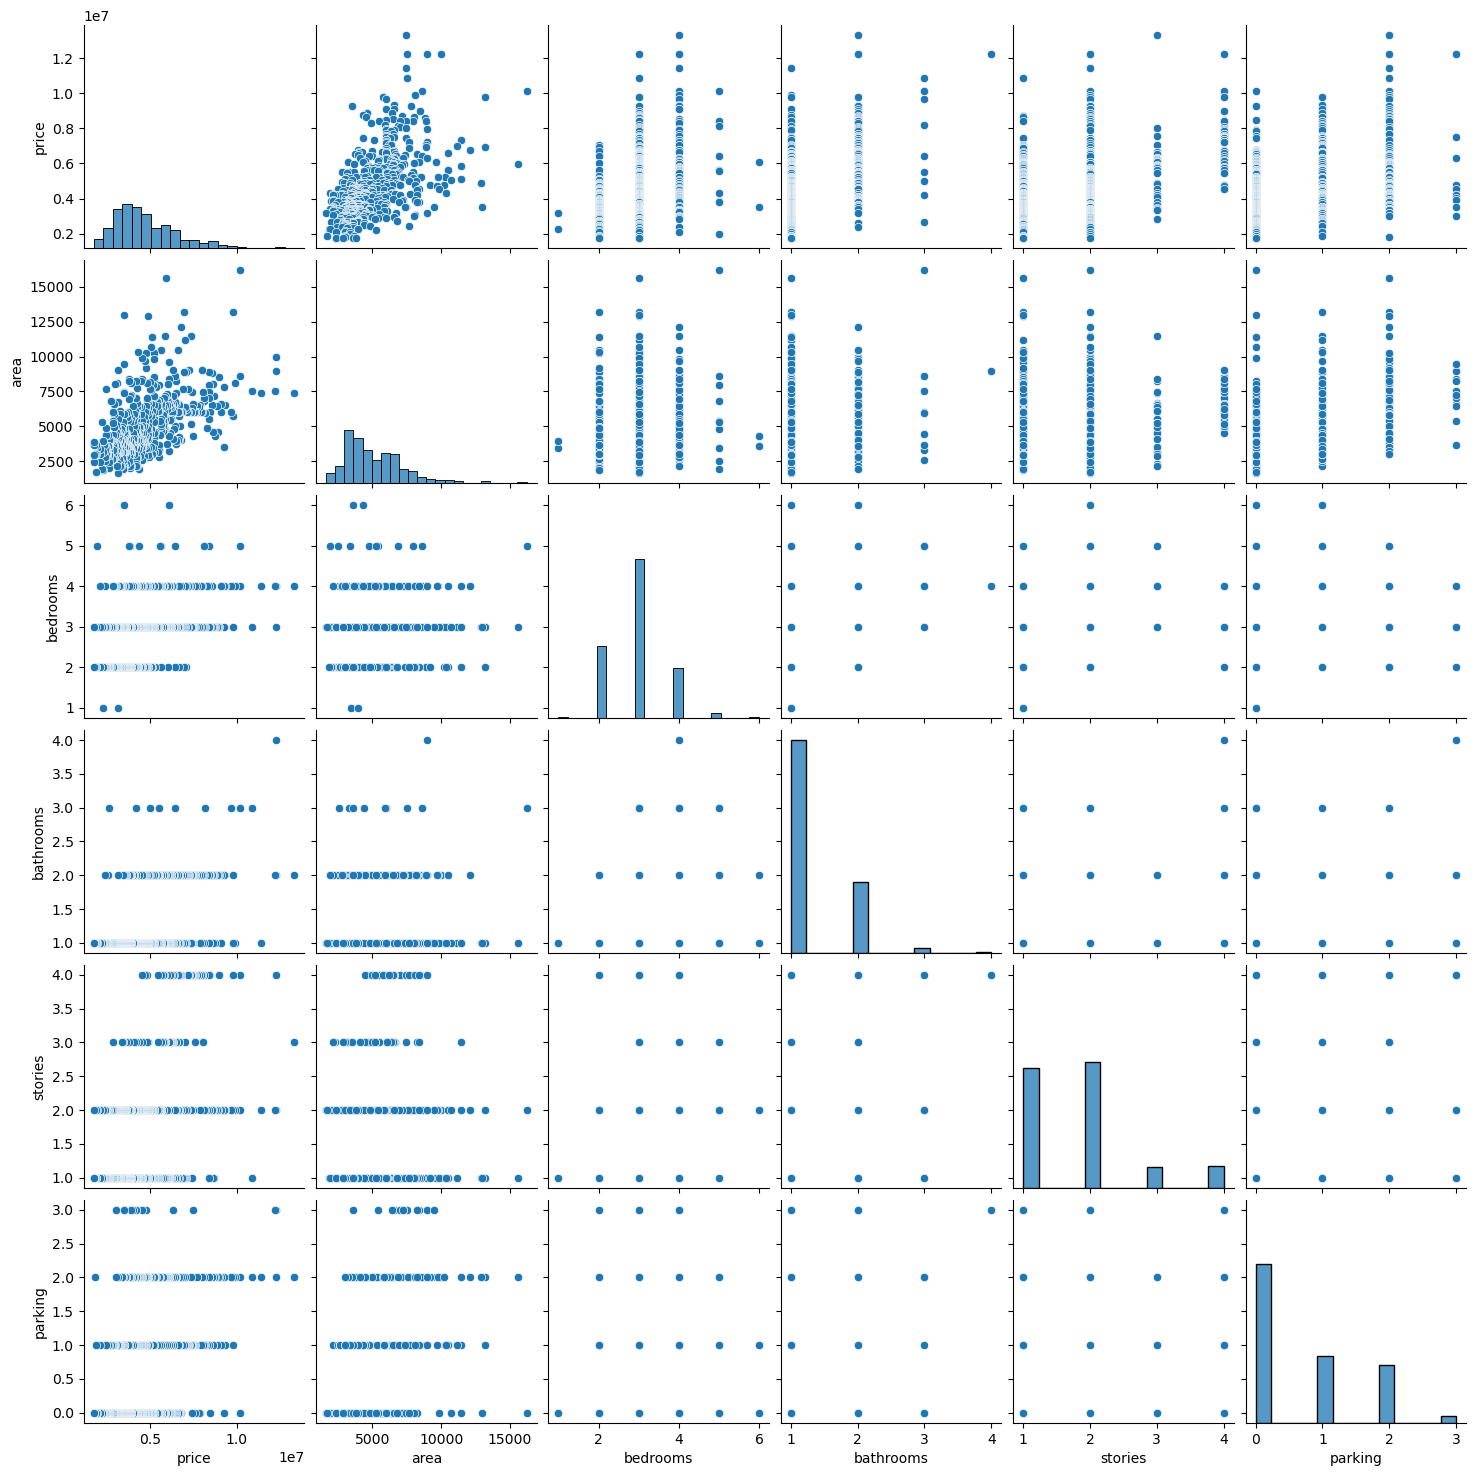

In [80]:
sns.pairplot(df)
plt.show()

In [82]:
df["furnishingstatus"].value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

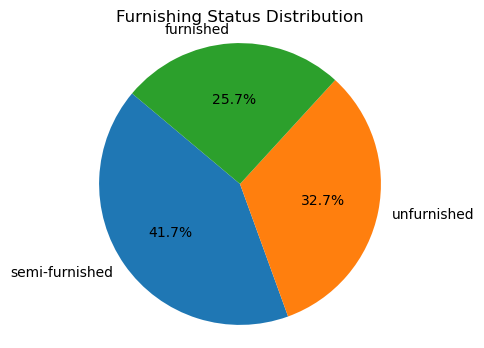

In [83]:
value_counts = df['furnishingstatus'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.title('Furnishing Status Distribution')
plt.show()

# Data Preprocessing

In [84]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
columns_to_encode = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

In [85]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [86]:
status = pd.get_dummies(df['furnishingstatus'], drop_first = True)
status

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
540,0,1
541,1,0
542,0,1
543,0,0


In [87]:
df = pd.concat([df, status], axis = 1)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [88]:
df.drop(['furnishingstatus'], axis = 1, inplace = True)

In [89]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


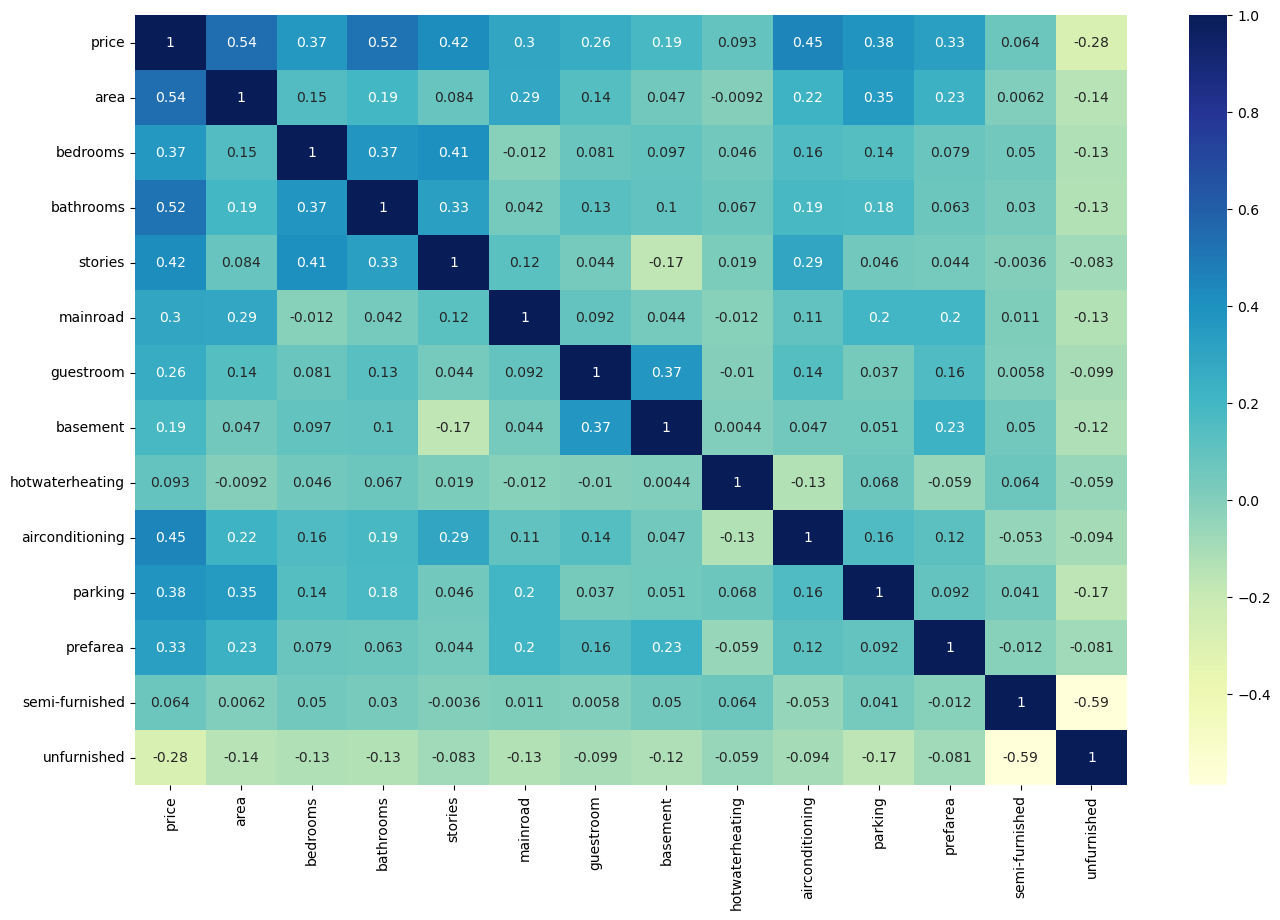

In [90]:
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

# Split data into Training and Testing data

In [91]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0:1]

In [92]:
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [93]:
y.head()

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000


In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [95]:
print('X train shape:', X_train.shape)
print('y train shape:', y_train.shape)

X train shape: (436, 13)
y train shape: (436, 1)


In [96]:
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
542,3620,2,1,1,1,0,0,0,0,0,0,0,1
496,4000,2,1,1,1,0,0,0,0,0,0,0,1
484,3040,2,1,1,0,0,0,0,0,0,0,0,1
507,3600,2,1,1,1,0,0,0,0,0,0,0,1
252,9860,3,1,1,1,0,0,0,0,0,0,1,0


In [97]:
y_train.head()

,price
542,1750000
496,2695000
484,2870000
507,2590000
252,4515000


# Scaling Training Data: MinMaxScaler

In [98]:
from sklearn.preprocessing import MinMaxScaler   
scaler = MinMaxScaler()

In [99]:
var_to_scale = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
X_train[var_to_scale] = scaler.fit_transform(X_train[var_to_scale]) 
X_test[var_to_scale] = scaler.fit_transform(X_test[var_to_scale]) 

In [100]:
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
542,0.124199,0.2,0.0,0.0,1,0,0,0,0,0.0,0,0,1
496,0.150654,0.2,0.0,0.0,1,0,0,0,0,0.0,0,0,1
484,0.083821,0.2,0.0,0.0,0,0,0,0,0,0.0,0,0,1
507,0.122807,0.2,0.0,0.0,1,0,0,0,0,0.0,0,0,1
252,0.558619,0.4,0.0,0.0,1,0,0,0,0,0.0,0,1,0


# Building a linear model

In [101]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [102]:
lr.coef_

array([[3635418.98,  610489.67, 1993947.38, 1300469.4 ,  441026.69,
         402848.69,  324747.71, 1210834.23,  871377.89,  650396.06,
         693144.41, -106659.88, -491782.18]])

In [103]:
lr.intercept_

array([2067085.66])

In [104]:
lr.score(X_train,y_train)

0.6822529683801706

In [105]:
y_pred = lr.predict(X_test)
y_pred

array([[ 4203319.66],
       [ 6773443.15],
       [ 4733893.76],
       [ 8048534.38],
       [ 3099317.86],
       [ 7098560.47],
       [ 3447633.14],
       [ 3491960.55],
       [ 3664969.29],
       [ 8549521.83],
       [ 6679877.61],
       [ 3973930.78],
       [ 4031493.62],
       [ 4929022.65],
       [ 4395907.47],
       [ 2126057.13],
       [ 4335265.8 ],
       [ 4082176.18],
       [ 3480302.72],
       [ 4862761.46],
       [ 6144849.62],
       [ 6435478.24],
       [ 5065993.87],
       [ 2770802.55],
       [ 5707827.56],
       [ 5549112.94],
       [ 5842125.47],
       [ 5899674.58],
       [ 5313578.64],
       [ 6204008.02],
       [ 3636449.52],
       [ 6545755.24],
       [ 7605376.39],
       [ 3138015.46],
       [ 4697432.05],
       [ 5583524.76],
       [ 5420338.38],
       [ 3901185.1 ],
       [ 3074671.15],
       [ 4078258.72],
       [ 8239521.97],
       [ 5010564.34],
       [ 6464304.21],
       [ 3856555.27],
       [ 4036908.43],
       [ 6

In [106]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.6156957185929337

In [107]:
y_test = y_test.values.reshape(-1,1)

In [108]:
dframe=pd.DataFrame({'actual':y_test.flatten(),'Predicted': y_pred.flatten().round(2)})
dframe

,actual,Predicted
0,4585000,4203319.66
1,6083000,6773443.15
2,4007500,4733893.76
3,6930000,8048534.38
4,2940000,3099317.86
...,...,...
104,6650000,7410889.03
105,5810000,5562434.65
106,4123000,4483690.36
107,3080000,5312249.05


# Model Evaluation

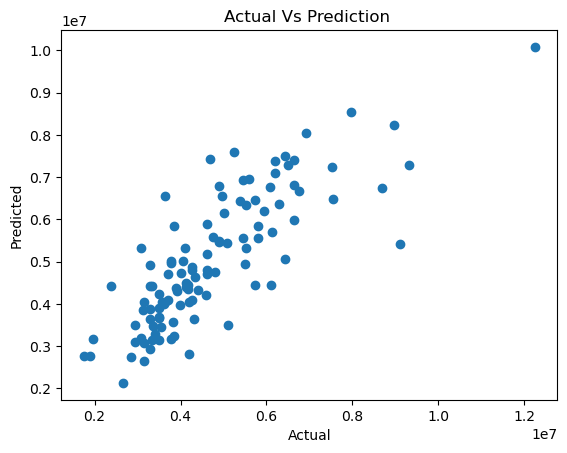

In [109]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
plt.title('Actual Vs Prediction ')
plt.xlabel('Actual')                         
plt.ylabel('Predicted')
plt.show()